<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/valves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Valves in process industry
#@markdown Introduction to valves in process industry


In [ ]:
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

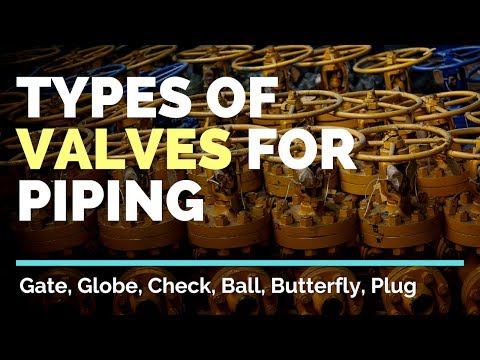

In [ ]:
#@title  Valves in oil and gas industry
#@markdown Types of Valves For Piping in Oil & Gas - Gate, Globe, Check, Ball, Butterfly, Plug
from IPython.display import YouTubeVideo
YouTubeVideo('BeHxGJYNyy0', width=600, height=400)

#Calculation of valves using NeqSim

Calculation of Joule Thomson cooling for a gas valve.

## Calculation of Gas Throttling through a Valve

In [ ]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 100.0 #bara
outletPressure = 10.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("methane", 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(1200.0, 'kg/hr')
# demonstration of setting up a simple process calculation

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure)
runProcess()

print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("temperature drop per bar ", (valve1.getOutStream().getTemperature('C')-inletTemperature)/(inletPressure-outletPressure) , 'C/bar')

temperature out of valve  -23.1599311102361  °C
temperature drop per bar  -0.4795547901137345 C/bar


## Calculation of Oil Throttling through a Valve
THe temeratur can increase when pressure is reduced in a valve and liquid has some flashing at end.

In [ ]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 100.0 #bara
outletPressure = 10.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("methane", 0.3)
fluid1.addComponent("ethane", 0.2)
fluid1.addComponent("nC20", 1.0)
fluid1.setMixingRule('classic')

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(1200.0, 'kg/hr')
# demonstration of setting up a simple process calculation
TPflash(fluid1)
printFrame(fluid1)

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure)
runProcess()

printFrame(valve1.getOutStream().getFluid())

print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("temperature increase per bar ", (valve1.getOutStream().getTemperature('C')-inletTemperature)/(inletPressure-outletPressure) , 'C/bar')

| 0                    | 1          | 2           | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:------------|:----|:----|:----|:----------------|
|                      | total      | OIL         |     |     |     |                 |
| methane              | 2E-1       | 2E-1        |     |     |     | [mole fraction] |
| ethane               | 1.33333E-1 | 1.33333E-1  |     |     |     | [mole fraction] |
| nC20                 | 6.66667E-1 | 6.66667E-1  |     |     |     | [mole fraction] |
|                      |            |             |     |     |     |                 |
| Density              |            | 8.1786E2    |     |     |     | kg/m3           |
| Phase Fraction       |            | 1E0         |     |     |     | [mole fraction] |
| Molar Mass           | 1.95618E-1 | 1.95618E-1  |     |     |     | kg/mol          |
| Z factor             |            | 9.81309E-1  |     |     |     | [-]             |
| Heat Capacity (Cp)   |        

## Calculation of Throttling Oil with some gas through a Valve


In [ ]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 100.0 #bara
outletPressure = 10.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("methane", 1.1)
fluid1.addComponent("ethane", 0.5)
fluid1.addComponent("nC20", 1.0)
fluid1.setMixingRule('classic')

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(1200.0, 'kg/hr')
# demonstration of setting up a simple process calculation

TPflash(fluid1)
printFrame(fluid1)
clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure)
runProcess()

print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("temperature drop per bar ", (valve1.getOutStream().getTemperature('C')-inletTemperature)/(inletPressure-outletPressure) , 'C/bar')

| 0                    | 1          | 2          | 3           | 4   | 5   | 6               |
|:---------------------|:-----------|:-----------|:------------|:----|:----|:----------------|
|                      | total      | GAS        | OIL         |     |     |                 |
| methane              | 4.23077E-1 | 8.68745E-1 | 4.13712E-1  |     |     | [mole fraction] |
| ethane               | 1.92308E-1 | 1.31253E-1 | 1.93591E-1  |     |     | [mole fraction] |
| nC20                 | 3.84615E-1 | 1.41609E-6 | 3.92697E-1  |     |     | [mole fraction] |
|                      |            |            |             |     |     |                 |
| Density              |            | 9.2543E1   | 7.39698E2   |     |     | kg/m3           |
| Phase Fraction       |            | 2.05809E-2 | 9.79419E-1  |     |     | [mole fraction] |
| Molar Mass           | 1.21262E-1 | 1.78845E-2 | 1.23435E-1  |     |     | kg/mol          |
| Z factor             |            | 7.92882E-1 |

# Sizing of valves
Valve sizing and selecting the appropriate flow coefficient (Cv) is a critical process in ensuring that a valve will function efficiently within a fluid system. The Cv is a measure of the capacity of the valve to flow a fluid with a certain pressure drop. The basic equation to size a valve for liquid service is:

$ Cv = \frac{Q}{\sqrt{\Delta P / (G_f \cdot SG)}} $

Where:
- $ Cv $ = Valve flow coefficient
- $ Q $ = Flow rate (in gallons per minute, GPM)
- $ \Delta P $ = Pressure drop across the valve (in pounds per square inch, psi)
- $ G_f $ = Specific gravity of fluid (water = 1 at 60°F)
- $ SG $ = Specific gravity of the fluid at flowing conditions (if the fluid is not water)

For gases, the equation is more complex due to compressibility factors, and it generally involves the following:

$ Cv = \frac{Q \cdot \sqrt{T}}{P_1 \cdot \sqrt{\Delta P}} \cdot Z $

Where:
- $ Cv $ = Valve flow coefficient
- $ Q $ = Flow rate (in standard cubic feet per hour, SCFH)
- $ T $ = Absolute temperature of the gas (in Rankine, R)
- $ P_1 $ = Inlet absolute pressure (in pounds per square inch absolute, psia)
- $ \Delta P $ = Differential pressure (in psi)
- $ Z $ = Compressibility factor of the gas

For steam or high-temperature gases, the equations can be further modified to account for the additional energy in the steam or gas due to its temperature.

When sizing a valve, there are several steps that should be followed:

1. **Understand the Application**: Determine what kind of fluid the valve will control, the required flow rate, the maximum and minimum operating pressures, the temperature of the fluid, and the type of control the valve will perform.

2. **Determine Flow Conditions**: Calculate the flow rate based on the system’s demand. For liquids, this will be in gallons per minute (GPM), and for gases, it could be in standard cubic feet per hour (SCFH) or another unit.

3. **Calculate the Pressure Drop**: Establish the allowable pressure drop across the valve. This could be a design constraint or could be derived from the system's operating conditions.

4. **Select Valve Type**: Based on the application (on/off service, throttling, etc.), choose the appropriate type of valve (gate, globe, ball, butterfly, etc.), which will have an inherent flow characteristic that affects the Cv.

5. **Size the Valve**: Use the appropriate equation for liquids or gases to solve for the Cv. In practical applications, you may iterate this process, using valve manufacturer's data and correcting for viscosity if dealing with non-water-like liquids.

6. **Consider Other Factors**: Factor in the viscosity of the fluid, potential cavitation (for liquids), and flashing (for gases), which can significantly affect the performance of the valve.

7. **Consult with Manufacturer’s Data**: Finally, compare the calculated Cv with the manufacturer’s data sheets and select a valve with a Cv that is close to but not less than the calculated value. It is usually advisable to choose a valve with a slightly higher Cv than calculated to ensure it will meet the required flow conditions.

Always ensure that the selected valve also meets the other design criteria for the system, such as maximum pressure and temperature ratings, materials compatible with the fluid, and any industry standards or regulations that apply to your application.

Valve sizing in SI units involves determining the appropriate Kv value for a valve, which indicates the flow rate in cubic meters per hour (m³/h) of water that the valve will pass with a pressure drop of 1 bar.

The equation to calculate the Kv for liquids is as follows:

$ Kv = \frac{Q}{\sqrt{\Delta P}} $

Where:
- $ Kv $ = Valve flow coefficient in SI units (m³/h)
- $ Q $ = Flow rate (m³/h)
- $ \Delta P $ = Pressure drop across the valve (bar)

It's important to note that this equation assumes water as the fluid. If the fluid is not water, you should adjust for the fluid’s density ($ \rho $ in kg/m³) using the following equation:

$ Kv = \frac{Q}{\sqrt{\Delta P \cdot \frac{\rho}{\rho_{water}}}} $

Where $ \rho_{water} $ is typically taken as 1000 kg/m³ at standard conditions.

For gases, the equation must account for the gas's compressibility, and it is:

$ Kv = \frac{343 \cdot Q}{P_1 \cdot \sqrt{T \cdot \Delta P \cdot SG}} $

Where:
- $ Kv $ = Valve flow coefficient in SI units (m³/h)
- $ Q $ = Flow rate at standard conditions (m³/h)
- $ P_1 $ = Upstream pressure (absolute bar)
- $ T $ = Absolute temperature (K)
- $ \Delta P $ = Pressure drop across the valve (bar)
- $ SG $ = Specific gravity of the gas (air = 1)

The 343 factor converts the flow rate to standard conditions (0°C and 1.01325 bar).

In [ ]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 80.0 #bara
outletPressure = 79.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("water", 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(2.0, 'MSm3/day')

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure, 'bara')
#valve1.setPercentValveOpening(100.0)
#valve1.setCv(100.0)
runProcess()

print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('MSm3/day'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")



pressure out of valve  79.0  bara
temperature out of valve  20.021974393624248  °C
flow rate valve  2.0000000000000004
flow rate valve  100.0  % open
valve Cv  73.11084124920933  Cv


#Typical Cv of valves
In SI units, the flow coefficient of a valve (Cv) is often converted to the Kv value, which is defined as the flow rate in cubic meters per hour (m³/h) of water at a temperature of 5-30°C that will flow through the valve with a pressure drop of 1 bar.

The conversion between Cv (imperial) and Kv (metric) is given by:

$ Kv = 0.865 \times Cv $

Let’s convert the aforementioned Cv values into Kv values:

1. **Small Ball Valves:**
   - 1/4 inch ball valve: Cv ~ 8 to 10 ⇒ Kv ~ 6.92 to 8.65
   - 1/2 inch ball valve: Cv ~ 15 to 23 ⇒ Kv ~ 12.98 to 19.90

2. **Larger Ball Valves:**
   - 2 inch ball valve: Cv ~ 275 to 300 ⇒ Kv ~ 237.88 to 259.50
   - 4 inch ball valve: Cv ~ 950 to 1300 ⇒ Kv ~ 822 to 1124.50

3. **Butterfly Valves:**
   - 2 inch butterfly valve: Cv ~ 200 to 250 ⇒ Kv ~ 173 to 216.25
   - 4 inch butterfly valve: Cv ~ 800 to 1000 ⇒ Kv ~ 692 to 865

4. **Globe Valves:**
   - 1/2 inch globe valve: Cv ~ 4 to 6 ⇒ Kv ~ 3.46 to 5.19
   - 2 inch globe valve: Cv ~ 45 to 60 ⇒ Kv ~ 38.93 to 51.90

5. **Gate Valves:**
   - 2 inch gate valve: Cv ~ 480 to 500 ⇒ Kv ~ 415.20 to 432.50
   - 4 inch gate valve: Cv ~ 1900 to 2100 ⇒ Kv ~ 1644.75 to 1816.75

6. **Diaphragm Valves:**
   - 1/2 inch diaphragm valve: Cv ~ 4 to 14 ⇒ Kv ~ 3.46 to 12.11
   - 2 inch diaphragm valve: Cv ~ 40 to 100 ⇒ Kv ~ 34.60 to 86.50

7. **Control Valves:** (Cv varies significantly with trim size and valve design)
   - 1 inch control valve: Cv ~ 20 to 100 ⇒ Kv ~ 17.30 to 86.50
   - 3 inch control valve: Cv ~ 100 to 500 ⇒ Kv ~ 86.50 to 432.50

Keep in mind that these Kv values, just like Cv values, are typical examples and can vary based on the specific valve type, manufacturer, design, and materials. It's essential to refer to the technical specifications provided by the valve manufacturer for accurate sizing in specific applications.

In [ ]:
# Liquids
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 80.0 #bara
outletPressure = 79.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("water", 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(2000.0, 'kg/hr')

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure, 'bara')
#valve1.setPercentValveOpening(100.0)
#valve1.setCv(100.0)
runProcess()

print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")
print("valve Kv ", valve1.getKv(), " Kv")
Kv = stream1.getFlowRate('m3/hr')/math.sqrt(inletPressure-outletPressure)
print('Kv ', Kv)
print('Cv ', Kv/0.865)

pressure out of valve  79.0  bara
temperature out of valve  20.021974393624077  °C
flow rate valve  2000.0
flow rate valve  100.0  % open
valve Cv  2.303005238850176  Cv
valve Kv  1.992219064749287  Kv
Kv  1.9844684009752622
Cv  2.294183122514754


## Theory Behind the IEC 60534 Control Valve Sizing Model

The `ControlValveSizing_IEC_60534_full` class implements the **IEC 60534-2-1** standard, which defines equations and correction factors for sizing control valves. This ensures valves operate efficiently across a wide range of fluids, pressures, and geometrical configurations.

---

### 1. Flow Coefficient (Kv / Cv)

The **flow coefficient** represents the capacity of the valve to pass fluid.

- **Kv** is defined as the volumetric flow rate $Q$ (in $m^3/h$) of water at $ρ = 1000 \, kg/m^3$ that passes through the valve with a $ΔP = 1 \, bar$.
- **Cv** is an equivalent coefficient used in the US system, with the relation:

$$
Cv = 1.156 \cdot Kv
$$

---

### 2. Basic Sizing Equations

#### For Liquids (IEC 60534-2-1 Eq. 8)
For turbulent, non-choked liquid flow, the equations are based on standard hydrodynamic principles for Newtonian incompressible fluids.

$$
Q = N_1 \cdot Kv \cdot \sqrt{\frac{ΔP}{ρ_r}}
$$

Where:
- $Q$ = volumetric flow rate $(m^3/h)$
- $ΔP = P_1 - P_2$ (pressure drop) $(bar)$
- $ρ_r = ρ / ρ_0$ (density ratio)
- $N_1 = 0.865$ (unit constant)

For **choked liquid flow**, the pressure drop $ΔP$ is limited by a **critical pressure ratio factor** $FF$ and the **liquid pressure recovery factor** $FL$:

$$
ΔP_{choked} = (P_1 - FF \cdot P_{sat}) \cdot FL^2
$$

---

#### For Gases (IEC 60534-2-1 Eq. 9)
For gases, the equation considers compressibility $Z$, molecular weight $MW$, temperature $T$, and an expansion factor $Y$.

$$
Q = N_9 \cdot Kv \cdot P_1 \cdot Y \cdot \sqrt{\frac{x}{ρ_r}}
$$

Where:
- $x = \frac{P_1 - P_2}{P_1}$ (pressure ratio)
- $Y = 1 - \frac{x}{3F_{\gamma}x_T}$ (expansion factor, min 2/3)
- $F_{\gamma} = \gamma / 1.4$ (ratio of specific heats correction)
- $N_9 = 27.3$ (unit constant for SI)

For **choked gas flow**, $x$ is limited by $x_T$ (critical pressure ratio factor for gas).

---

### 3. Correction Factors

#### a) Piping Geometry Factor (Fp, FLP, xTP)
When a valve is connected to pipes with reducers or expanders, flow is affected by additional pressure losses. These are modeled by:

$$
FP = \frac{1}{\sqrt{1 + \frac{K_p}{N_2} \left( \frac{Kv}{d^2} \right)^2 }}
$$

- $K_p$ = loss coefficient derived from geometry
- $d$ = valve port diameter

Similarly, **FLP** and **xTP** adjust the pressure recovery factor $FL$ and gas critical pressure ratio $xT$ to account for piping effects.

---

#### b) Reynolds Number Factor (FR)
For **laminar** or **transitional** flow (Reynolds number $Re_v < 10^4$), the IEC 60534 standard specifies a correction factor $FR$:

$$
FR = f(Re_v, C/d^2, FL)
$$

- $Re_v$ is calculated based on flow rate, viscosity, and valve diameter:

$$
Re_v = N_4 \cdot F_d \cdot \frac{Q}{\nu} \cdot \frac{1}{\sqrt{C FL}}
$$

where $ν$ is the kinematic viscosity.

For $Re_v \rightarrow \infty$, $FR \rightarrow 1$ (turbulent flow).
For lower $Re_v$, $FR < 1$, reducing the effective $Kv$.

---

### 4. Iterative Approach

The full IEC model is **nonlinear**, as correction factors $FP$, $FLP$, $xTP$, and $FR$ depend on the flow coefficient $Kv$ itself.

- The algorithm starts with an **initial guess** (turbulent, no corrections).
- It applies corrections iteratively:
  - Update $FP$, $FLP$, $xTP$, or $FR$
  - Recalculate $Kv$
  - Repeat until **convergence** (error < $10^{-3}$)

This ensures accurate predictions for real-world valve behavior.

---

### 5. Choked Flow Conditions

IEC 60534 defines **choked flow** as the point where increasing the pressure drop ($ΔP$) no longer increases the flow rate.
- For liquids, choking can occur due to cavitation or flashing, which limits $ΔP$.
- For gases, choking happens when the fluid velocity reaches the speed of sound at the narrowest point of the flow (vena contracta).

---

### 6. Numerical Solvers

The model incorporates:
- **Bisection search** to solve for:
  - Flow rate $Q$ for a given valve opening.
  - Valve opening percentage (%) for a desired flow rate.
- This approach ensures **stability** and helps avoid divergence in the calculations.

---

### References
- IEC 60534-2-1: *Flow capacity of control valves*
- IEC 60534-8-3: *Noise prediction for hydrodynamic flow*
- https://github.com/equinor/neqsim/blob/master/src/main/java/neqsim/process/mechanicaldesign/valve/ControlValveSizing_IEC_60534_full.java

In [ ]:
# Liquids
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 80.0 #bara
outletPressure = 79.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("water", 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(2000.0, 'kg/hr')

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure, 'bara')
valve1.getMechanicalDesign().setValveSizingStandard("IEC 60534 full");
runProcess()

print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")
print("valve Kv ", valve1.getKv(), " Kv")
Kv = stream1.getFlowRate('m3/hr')/math.sqrt(inletPressure-outletPressure)
print('Kv ', Kv)
print('Cv ', Kv/0.865)

pressure out of valve  79.0  bara
temperature out of valve  20.021974393624077  °C
flow rate valve  2000.0
flow rate valve  100.0  % open
valve Cv  0.06186263405647487  Cv
valve Kv  0.0535143893222101  Kv
Kv  1.9844684009752622
Cv  2.294183122514754


In [ ]:
# Gases
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 80.0 #bara
outletPressure = 70.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("methane", 1.0)
fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(2000.0, 'kg/hr')

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure, 'bara')
valve1.getMechanicalDesign().setValveSizingStandard("IEC 60534 full");
runProcess()

#IEC 60534 full
print("IEC 60534 full")
print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")
print("valve Kv ", valve1.getKv(), " Kv")

IEC 60534 full
pressure out of valve  70.0  bara
temperature out of valve  16.158872249206638  °C
flow rate valve  2000.0
flow rate valve  100.0  % open
valve Cv  0.054767121265849456  Cv
valve Kv  0.04737640247910853  Kv


In [ ]:
clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.setOutletPressure(outletPressure, 'bara')
valve1.getMechanicalDesign().setValveSizingStandard("IEC 60534");
runProcess()

#IEC 60534 full
print("IEC 60534 simplified")
print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")
print("valve Kv ", valve1.getKv(), " Kv")

IEC 60534 simplified
pressure out of valve  70.0  bara
temperature out of valve  16.158872249206638  °C
flow rate valve  2000.0
flow rate valve  100.0  % open
valve Cv  0.05434145095458609  Cv
valve Kv  0.04700817556625095  Kv


# Default Cv calcs in NeqSim
Wrong for gas, but useable in dynamic simulations

## Mathematics Behind the `ControlValveSizing` Class

The `ControlValveSizing` class in NeqSim implements a **simplified mathematical model** for sizing control valves based on standard valve sizing equations. Unlike the full IEC 60534 implementation, this class uses **basic turbulent-flow equations** without corrections for piping geometry, Reynolds number, or choking effects (except for a simple flag).

* * *

### 1. Flow Coefficient (Kv and Cv)

The valve capacity is described by the **flow coefficient**:

- **Kv**: Flow in \( m^3/h \) of water (\(\rho = 1000 \, kg/m^3\)) with a pressure drop \( \Delta P = 1 \, bar \).
- **Cv**: US customary equivalent, with the relation:

\begin{equation}
Cv = 1.156 \cdot Kv
\end{equation}

Conversions:
\begin{equation}
Kv = \frac{Cv}{1.156}
\end{equation}

* * *

### 2. Basic Equation for Liquids

For **incompressible (liquid) flow**, the class uses the standard quadratic relationship:

\begin{equation}
Q = Kv \cdot \sqrt{\frac{\Delta P}{\rho_r}}
\end{equation}

Where:
- \( Q \) = volumetric flow \( (m^3/h) \)
- \( \Delta P = P_1 - P_2 \) = pressure drop \( (bar) \)
- \( \rho_r = \rho / 1000 \) = relative density (water = 1)

Rearranging for \( Kv \):
\begin{equation}
Kv = \frac{Q}{\sqrt{\frac{\Delta P}{\rho_r}}}
\end{equation}

* * *

### 3. Basic Equation for Gases (and gas-liquid fluids)

For gases, the same formula is applied **without corrections for compressibility, sonic velocity, or expansion factor**:

\begin{equation}
Q = Kv \cdot \sqrt{\frac{\Delta P}{\rho}}
\end{equation}

Here, \( \rho \) is used directly (no relative density correction), simplifying the equation.

* * *

### 4. Flow Rate from Valve Opening

The class assumes \( Kv \) is proportional to the valve opening percentage \( O \) (linear characteristic):

\begin{equation}
Kv_{effective} = Kv_{max} \cdot \frac{O}{100}
\end{equation}

The flow rate \( Q \) is then calculated as:

\begin{equation}
Q = \frac{Kv_{effective}}{3600} \cdot \sqrt{\frac{\Delta P}{\rho_r}}
\end{equation}

Here the division by 3600 converts \( m^3/h \) to \( m^3/s \).

* * *

### 5. Finding Outlet Pressure

From the basic formula, the pressure drop \( \Delta P \) can be rearranged:

\begin{equation}
\Delta P = \left( \frac{Q \cdot 3600}{Kv_{effective}} \right)^2 \cdot \rho_r
\end{equation}

The outlet pressure \( P_2 \) is then:

\begin{equation}
P_2 = P_1 - \Delta P
\end{equation}

where:
- \( P_1 \) = inlet pressure \( (bar) \)
- \( P_2 \) is returned in \( Pa \) after converting \( bar \rightarrow Pa \).

* * *

### 6. Molar Flow Rate Calculation

The method `calculateMolarFlow` computes the volumetric flow \( Q \) as:

\begin{equation}
Q = \frac{Kv_{effective}}{3600} \cdot \sqrt{\frac{\Delta P}{\rho_r}}
\end{equation}

This volumetric flow is then returned directly as \( m^3/s \), without applying corrections for gas compressibility or choked flow.

* * *

### 7. Outlet Pressure for Fixed Kv

The method `calculateOutletPressure` rearranges the Kv formula to compute outlet pressure \( P_2 \) for a given \( Kv_{effective} \):

\begin{equation}
P_2 = (P_1 - \Delta P) \cdot 10^5
\end{equation}

where \( \Delta P \) is calculated using the same quadratic relationship.

* * *

### 8. Limitations of This Model

- No **Reynolds number correction**.
- No **piping geometry factor**.
- No **choked-flow** or **critical pressure** consideration (only a boolean flag).
- Assumes **linear valve opening vs. Kv** relationship.

* * *

## References

- IEC 60534-2-1: *Flow capacity of control valves*
- Standard control valve equations in process engineering literature.

In [ ]:
# Liquids
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve

inletTemperature = 20.0 #C
inletPressure = 80.0 #bara
outletPressure = 79.0 #bara
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("water", 1.0)

fluid1.setTemperature(inletTemperature, "C")
fluid1.setPressure(inletPressure, "bara")
fluid1.setTotalFlowRate(2000.0, 'kg/hr')

clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.getMechanicalDesign().setValveSizingStandard("default"); # will be used if not stated
valve1.setOutletPressure(outletPressure, 'bara')
valve1.getMechanicalDesign().setValveSizingStandard("IEC 60534 full");
runProcess()

print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")
print("valve Kv ", valve1.getKv(), " Kv")
Kv = stream1.getFlowRate('m3/hr')/math.sqrt(inletPressure-outletPressure)
print('Kv ', Kv)
print('Cv ', Kv/0.865)

pressure out of valve  79.0  bara
temperature out of valve  20.021974393624077  °C
flow rate valve  2000.0
flow rate valve  100.0  % open
valve Cv  0.06186263405647487  Cv
valve Kv  0.0535143893222101  Kv
Kv  1.9844684009752622
Cv  2.294183122514754


In [ ]:
from neqsim.process import runtrans
clearProcess()
stream1 = stream('stream 1', fluid1)
valve1 = valve('valve 1', stream1)
valve1.getMechanicalDesign().setValveSizingStandard("default"); # will be used if not stated
valve1.setOutletPressure(outletPressure, 'bara')
runProcess()

#IEC 60534 full
print("default valve")
print("pressure out of valve ", valve1.getOutStream().getPressure('bara'), " bara")
print("temperature out of valve ", valve1.getOutStream().getTemperature('C'), " °C")
print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")
print("valve Cv ", valve1.getCv(), " Cv")
print("valve Kv ", valve1.getKv(), " Kv")
print("valve Cg ", valve1.getCg(), " Cg")

valve1.setPercentValveOpening(50)
valve1.runTransient(1.0)

print("flow rate valve ", valve1.getOutStream().getFlowRate('kg/hr'))
print("flow rate valve ", valve1.getPercentValveOpening(), " % open")

default valve
pressure out of valve  79.0  bara
temperature out of valve  20.021974393624077  °C
flow rate valve  2000.0
flow rate valve  100.0  % open
valve Cv  2.303005238850176  Cv
valve Kv  1.992219064749287  Kv
valve Cg  3132.087124836239  Cg
flow rate valve  2000.0
flow rate valve  50.0  % open
